# Qualitative comparison of scikit-learn over-sampling methods


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

### Generate synthetic datasets

In [2]:
def deplete(X , y, lab, frac):
    """
    make an imbalanced dataset
    X     - features
    y     - labels
    lab   - subclass to deplete (0 or 1)
    frac  - fraction of samples to remove
    """
    np.random.seed(1)
    X_pos = X[y==1,:]
    len_pos = len(X_pos)
    X_neg = X[y==0,:]
    len_neg = len(X_neg)
    if lab==1:
        np.random.shuffle(X_pos)
        X_pos = X_pos[:int(frac*len_pos)]
    else:
        np.random.shuffle(X_neg)
        X_neg = X_neg[:int(frac*len_neg)]
    # add label, concatenate, shuffle
    X_pos = np.hstack((X_pos,np.ones((len(X_pos),1))))
    X_neg = np.hstack((X_neg,np.zeros((len(X_neg),1))))
    X = np.concatenate((X_neg, X_pos))
    np.random.shuffle(X)
    y = X[:,2]
    X = X[:,:2]
    return X, y

In [3]:
clust = make_classification(n_samples=500,
                           n_features=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1,
                           weights=[0.95], 
                           flip_y=0,
                           random_state=10)

In [4]:
blobs = make_blobs(n_samples=[500,10],
                  n_features=2, 
                  centers=[[1,1],[4,4]], 
                  random_state=1)

In [5]:
X, y = make_gaussian_quantiles(n_samples=500,
                                n_features=2, 
                                n_classes=2, 
                                random_state=1)
# subsample 5% of class 1
gauss = deplete(X , y, 1, 0.05)

In [6]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
# subsample 5% of class 1
moons = deplete(X , y, 1, 0.05)

In [7]:
datasets = [clust, blobs, gauss, moons]

### Select over-sampling algorithms

In [8]:
names = ["RandomOverSampler", "SMOTE (k3)", "SMOTE (k5)", "ADASYN", "BorderlineSMOTE", "SVMSMOTE"]

In [9]:
oversamplers = [
                RandomOverSampler(),
                SMOTE(k_neighbors=3),
                SMOTE(k_neighbors=5),
                ADASYN(random_state=42),
                BorderlineSMOTE(),
                SVMSMOTE()
]

### Oversampling and plotting

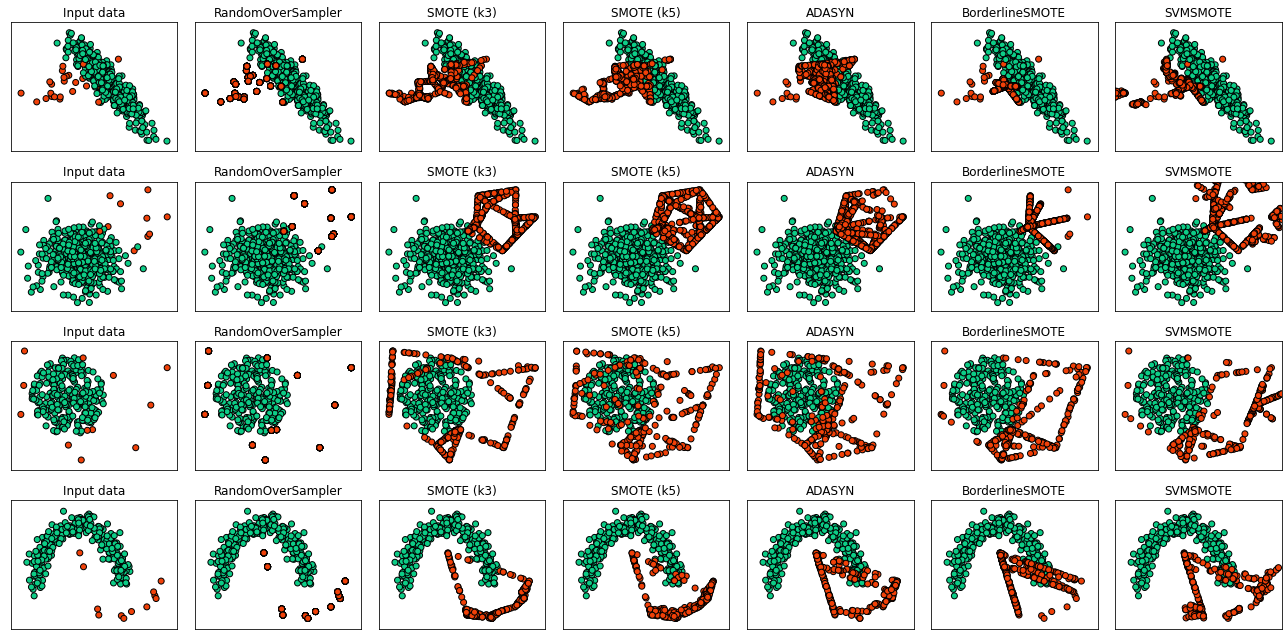

In [10]:
figure = plt.figure(figsize=(18, 9))
i = 1
# iterate over original datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds

    X = StandardScaler().fit_transform(X) # standartize the features

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
   
    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#0DCD87','#F14109'])
    ax = plt.subplot(len(datasets), len(oversamplers)+1, i)
    ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    for name, ovsmp in zip(names, oversamplers):
        ax = plt.subplot(len(datasets), len(oversamplers)+1, i)
        X_os, y_os = ovsmp.fit_resample(X, y)

        ax.set_title(name)
        ax.scatter(X_os[:, 0], X_os[:, 1], c=y_os, cmap=cm_bright, edgecolors='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()